In [2]:
!git clone https://github.com/xinychen/transdim.git

fatal: destination path 'transdim' already exists and is not an empty directory.


In [3]:
from IPython.display import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import os
import numpy as np
import warnings
import logging
import importlib
from sklearn.utils import check_array


#import required packages
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
uploaded = files.upload()

Saving tensor.png to tensor.png


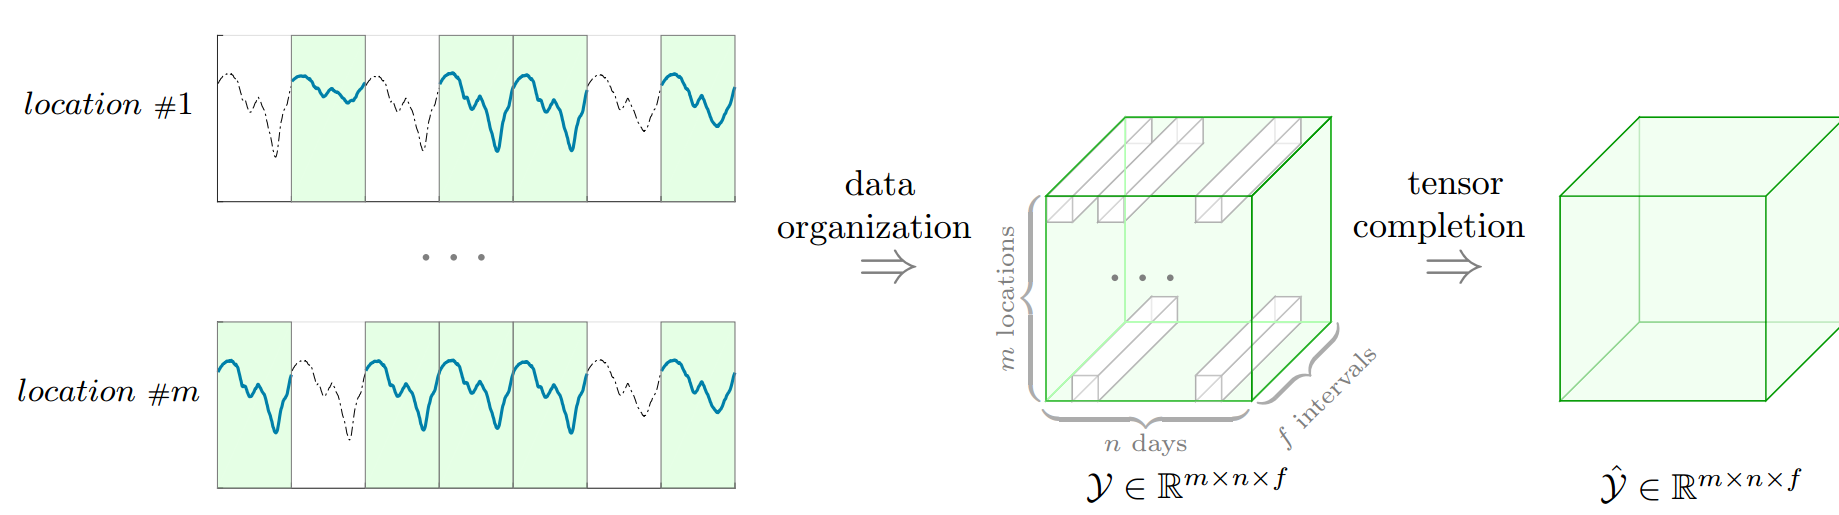

In [ ]:
Image("tensor.png", width=1000)

In [ ]:
# jupyter Notebook

#super_df =  pd.read_csv('./data/superdfi.csv', header=0, index_col=0)
#aux = super_df[(super_df['Sensor'] == 'sensor14v2.csv') | (super_df['Sensor'] == 'sensor13v2.csv') | (super_df['Sensor'] == 'sensor12v2.csv') | (super_df['Sensor'] == 'sensor11v2.csv') | (super_df['Sensor'] == 'sensor10v2.csv') | (super_df['Sensor'] == 'sensor9v2.csv') | (super_df['Sensor'] == 'sensor8v2.csv') | (super_df['Sensor'] == 'sensor7v2.csv') ]
#aux = super_df.copy(deep=True)

In [6]:
#Colab

super_df =  pd.read_csv('/content/drive/MyDrive/IMT Atlantique/Project_S5_Air/air-polution-sensor/data/superdfi.csv', header=0, index_col=0)
#aux = super_df[(super_df['Sensor'] == 'sensor14v2.csv') | (super_df['Sensor'] == 'sensor13v2.csv') | (super_df['Sensor'] == 'sensor12v2.csv') | (super_df['Sensor'] == 'sensor11v2.csv') | (super_df['Sensor'] == 'sensor10v2.csv') | (super_df['Sensor'] == 'sensor9v2.csv') | (super_df['Sensor'] == 'sensor8v2.csv') | (super_df['Sensor'] == 'sensor7v2.csv') ]
aux = super_df.copy(deep=True)

In [7]:
aux = pd.pivot_table(data=aux,values='PM2_MOY',index='Sensor',columns= ['Date', 'Hour'])
#aux = aux.dropna(axis= 1)
columnst = aux.columns
indext = aux.index

In [8]:
aux= aux.T.reset_index(drop=True).T
aux

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393
Sensor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sensor10v2.csv,NaN,NaN,NaN,NaN,NaN,12.0,15.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,17.0,16.0,15.0,13.0,12.0,11.0,11.0,10.0,10.0,10.0,...,24.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,27.0,28.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor11v2.csv,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor12v2.csv,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,9.0,10.0,10.0,10.0,10.0,11.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor13v2.csv,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor14v2.csv,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,18.0,19.0,20.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,22.0,25.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor15v2.csv,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,...,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor16v2.csv,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor17v2.csv,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,14.0,NaN,NaN,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor19v2.csv,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
aux.shape

(43, 1394)

In [10]:
f = 25 # window of the time series
outTensor = np.array([]).reshape(aux.shape[0], 0, f)

for t in range(0, aux.shape[1], f):
  auxTenso = aux.values[:,t:t+f][:, None]
  auxTenso = np.pad(auxTenso, ((0,0),(0,0),(0,f-auxTenso.shape[2])), mode='constant')
  outTensor = np.append(outTensor, auxTenso, axis = 1)
print(outTensor.shape)

(43, 56, 25)


In [11]:
np.isnan(outTensor).sum()/np.prod(outTensor.shape)

0.07421926910299004

In [12]:
def plotTs(actual, imputed, title):
  plt.figure(figsize=(20,10))
  plt.plot(actual, 'r', label='Actual', linewidth=0.8)
  plt.plot(imputed, 'b', label='Imputated', linewidth=0.8 )
  plt.title(title, size = 20)
  plt.xlabel('Time',size=18)
  plt.ylabel('Average PM2.5',size=18)
  plt.legend(fontsize=20)
  plt.show()

# BPMF

In [31]:
!pip install -U scipy

     |████████████████████████████████| 27.4MB 119kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:

import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from numpy.linalg import solve as solve
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

In [ ]:
def sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau, beta0 = 1, vargin = 0):
    """Sampling N-by-R factor matrix W and its hyperparameters (mu_w, Lambda_w)."""
    
    dim1, rank = W.shape
    W_bar = np.mean(W, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_mu_hyper = temp * W_bar
    var_W_hyper = inv(np.eye(rank) + cov_mat(W, W_bar) + temp * beta0 * np.outer(W_bar, W_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_W_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim1 + beta0) * var_Lambda_hyper)
    
    if dim1 * rank ** 2 > 1e+8:
        vargin = 1
    
    if vargin == 0:
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = (var2 @ tau_ind.T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, np.newaxis]
        var4 = var1 @ tau_sparse_mat.T + (var_Lambda_hyper @ var_mu_hyper)[:, np.newaxis]
        for i in range(dim1):
            W[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
    elif vargin == 1:
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            var_mu = tau * Xt.T @ sparse_mat[i, pos0[0]] + var_Lambda_hyper @ var_mu_hyper
            var_Lambda = tau * Xt.T @ Xt + var_Lambda_hyper
            W[i, :] = mvnrnd_pre(solve(var_Lambda, var_mu), var_Lambda)
    
    return W

In [ ]:
def sample_factor_x(tau_sparse_mat, tau_ind, W, X, beta0 = 1):
    """Sampling T-by-R factor matrix X and its hyperparameters (mu_x, Lambda_x)."""
    
    dim2, rank = X.shape
    X_bar = np.mean(X, axis = 0)
    temp = dim2 / (dim2 + beta0)
    var_mu_hyper = temp * X_bar
    var_X_hyper = inv(np.eye(rank) + cov_mat(X, X_bar) + temp * beta0 * np.outer(X_bar, X_bar))
    var_Lambda_hyper = wishart.rvs(df = dim2 + rank, scale = var_X_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim2 + beta0) * var_Lambda_hyper)
    
    
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ tau_ind).reshape([rank, rank, dim2]) + var_Lambda_hyper[:, :, np.newaxis]
    var4 = var1 @ tau_sparse_mat + (var_Lambda_hyper @ var_mu_hyper)[:, np.newaxis]
    for t in range(dim2):
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t]), var3[:, :, t])

    return X

In [ ]:
def sample_precision_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind)
    return np.random.gamma(var_alpha, 1 / var_beta)

In [ ]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [ ]:

def BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter):
    """Bayesian Probabilistic Matrix Factorization, BPMF."""
    
    dim1, dim2 = sparse_mat.shape
    W = init["W"]
    X = init["X"]
    if np.isnan(sparse_mat).any() == False:
        ind = sparse_mat != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_mat != 0) & (sparse_mat == 0))
    elif np.isnan(sparse_mat).any() == True:
        pos_test = np.where((dense_mat != 0) & (np.isnan(sparse_mat)))
        ind = ~np.isnan(sparse_mat)
        pos_obs = np.where(ind)
        sparse_mat[np.isnan(sparse_mat)] = 0
    dense_test = dense_mat[pos_test]
    del dense_mat
    tau = 1
    W_plus = np.zeros((dim1, rank))
    X_plus = np.zeros((dim2, rank))
    temp_hat = np.zeros(sparse_mat.shape)
    show_iter = 200
    mat_hat_plus = np.zeros(sparse_mat.shape)
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau * ind
        tau_sparse_mat = tau * sparse_mat
        W = sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau)
        X = sample_factor_x(tau_sparse_mat, tau_ind, W, X)
        mat_hat = W @ X.T
        tau = sample_precision_tau(sparse_mat, mat_hat, ind)
        temp_hat += mat_hat
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat[pos_test])))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat[pos_test])))
            temp_hat = np.zeros(sparse_mat.shape)
            print()
        if it + 1 > burn_iter:
            W_plus += W
            X_plus += X
            mat_hat_plus += mat_hat
    mat_hat = mat_hat_plus / gibbs_iter
    W = W_plus / gibbs_iter
    X = X_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, mat_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, mat_hat[pos_test])))
    print()
    
    return mat_hat, W, X

## Non-random missing (NM) tests 

In [ ]:
#Guangzhou Dataset Transdim

# tensor = scipy.io.loadmat('./data/tensor.mat')['tensor']
# random_matrix = scipy.io.loadmat('./data/random_matrix.mat')['random_matrix']
# random_tensor = scipy.io.loadmat('./data/random_tensor.mat')['random_tensor']

# tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/tensor.mat')['tensor']
# random_matrix = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_matrix.mat')['random_matrix']
# random_tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_tensor.mat')['random_tensor']

In [ ]:
import scipy.io



tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.4

## Non-random missing (NM)
binary_tensor = np.zeros(tensor.shape)
for i1 in range(tensor.shape[0]):
    for i2 in range(tensor.shape[1]):
        binary_tensor[i1, i2, :] = np.round(random_matrix[i1, i2] + 0.5 - missing_rate)
binary_mat = binary_tensor.reshape([binary_tensor.shape[0], binary_tensor.shape[1] * binary_tensor.shape[2]])
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
tensor.shape

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 60
init = {"W": 0.01 * np.random.randn(dim1, rank), "X": 0.01 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X = BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

## Random Mising Test 

In [ ]:
import scipy.io

tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.3

## Random missing (RM)
binary_mat = (np.round(random_tensor + 0.5 - missing_rate)
              .reshape([random_tensor.shape[0], random_tensor.shape[1] * random_tensor.shape[2]]))
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 80
init = {"W": 0.1 * np.random.randn(dim1, rank), "X": 0.1 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X = BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

In [ ]:
plotTs(dense_mat[0], mat_hat[0], title='Average PM2.5 filled by BPMF,when the percentage of missing values equals 30%')

# Bayesian Temporal Matrix Factorization (**BTMF**)

In [13]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from scipy.stats import invwishart
from numpy.linalg import solve as solve
from numpy.linalg import cholesky as cholesky_lower
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:

def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

In [15]:
def sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau, beta0 = 1, vargin = 0):
    """Sampling N-by-R factor matrix W and its hyperparameters (mu_w, Lambda_w)."""
    
    dim1, rank = W.shape
    W_bar = np.mean(W, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_W_hyper = inv(np.eye(rank) + cov_mat(W, W_bar) + temp * beta0 * np.outer(W_bar, W_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_W_hyper)
    var_mu_hyper = mvnrnd_pre(temp * W_bar, (dim1 + beta0) * var_Lambda_hyper)
    
    if dim1 * rank ** 2 > 1e+8:
        vargin = 1
    
    if vargin == 0:
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = (var2 @ tau_ind.T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, None]
        var4 = var1 @ tau_sparse_mat.T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
        for i in range(dim1):
            W[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
    elif vargin == 1:
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            var_mu = tau[i] * Xt.T @ sparse_mat[i, pos0[0]] + var_Lambda_hyper @ var_mu_hyper
            var_Lambda = tau[i] * Xt.T @ Xt + var_Lambda_hyper
            W[i, :] = mvnrnd_pre(solve(var_Lambda, var_mu), var_Lambda)
    
    return W

In [16]:
def mnrnd(M, U, V):
    """
    Generate matrix normal distributed random matrix.
    M is a m-by-n matrix, U is a m-by-m matrix, and V is a n-by-n matrix.
    """
    dim1, dim2 = M.shape
    X0 = np.random.randn(dim1, dim2)
    P = cholesky_lower(U)
    Q = cholesky_lower(V)
    
    return M + P @ X0 @ Q.T

def sample_var_coefficient(X, time_lags):
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    
    Z_mat = X[tmax : dim, :]
    Q_mat = np.zeros((dim - tmax, rank * d))
    for k in range(d):
        Q_mat[:, k * rank : (k + 1) * rank] = X[tmax - time_lags[k] : dim - time_lags[k], :]
    var_Psi0 = np.eye(rank * d) + Q_mat.T @ Q_mat
    var_Psi = inv(var_Psi0)
    var_M = var_Psi @ Q_mat.T @ Z_mat
    var_S = np.eye(rank) + Z_mat.T @ Z_mat - var_M.T @ var_Psi0 @ var_M
    Sigma = invwishart.rvs(df = rank + dim - tmax, scale = var_S)
    
    return mnrnd(var_M, var_Psi, Sigma), Sigma

In [17]:
def sample_factor_x(tau_sparse_mat, tau_ind, time_lags, W, X, A, Lambda_x):
    """Sampling T-by-R factor matrix X."""
    
    dim2, rank = X.shape
    tmax = np.max(time_lags)
    tmin = np.min(time_lags)
    d = time_lags.shape[0]
    A0 = np.dstack([A] * d)
    for k in range(d):
        A0[k * rank : (k + 1) * rank, :, k] = 0
    mat0 = Lambda_x @ A.T
    mat1 = np.einsum('kij, jt -> kit', A.reshape([d, rank, rank]), Lambda_x)
    mat2 = np.einsum('kit, kjt -> ij', mat1, A.reshape([d, rank, rank]))
    
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ tau_ind).reshape([rank, rank, dim2]) + Lambda_x[:, :, None]
    var4 = var1 @ tau_sparse_mat
    for t in range(dim2):
        Mt = np.zeros((rank, rank))
        Nt = np.zeros(rank)
        Qt = mat0 @ X[t - time_lags, :].reshape(rank * d)
        index = list(range(0, d))
        if t >= dim2 - tmax and t < dim2 - tmin:
            index = list(np.where(t + time_lags < dim2))[0]
        elif t < tmax:
            Qt = np.zeros(rank)
            index = list(np.where(t + time_lags >= tmax))[0]
        if t < dim2 - tmin:
            Mt = mat2.copy()
            temp = np.zeros((rank * d, len(index)))
            n = 0
            for k in index:
                temp[:, n] = X[t + time_lags[k] - time_lags, :].reshape(rank * d)
                n += 1
            temp0 = X[t + time_lags[index], :].T - np.einsum('ijk, ik -> jk', A0[:, :, index], temp)
            Nt = np.einsum('kij, jk -> i', mat1[index, :, :], temp0)
        
        var3[:, :, t] = var3[:, :, t] + Mt
        if t < tmax:
            var3[:, :, t] = var3[:, :, t] - Lambda_x + np.eye(rank)
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t] + Nt + Qt), var3[:, :, t])

    return X

In [18]:

def sample_precision_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind, axis = 1)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind, axis = 1)
    return np.random.gamma(var_alpha, 1 / var_beta)

def sample_precision_scalar_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind)
    return np.random.gamma(var_alpha, 1 / var_beta)

In [19]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [20]:
def BTMF(dense_mat, sparse_mat, init, rank, time_lags, burn_iter, gibbs_iter, option = "factor"):
    """Bayesian Temporal Matrix Factorization, BTMF."""
    
    dim1, dim2 = sparse_mat.shape
    d = time_lags.shape[0]
    W = init["W"]
    X = init["X"]
    if np.isnan(sparse_mat).any() == False:
        ind = sparse_mat != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_mat != 0) & (sparse_mat == 0))
    elif np.isnan(sparse_mat).any() == True:
        pos_test = np.where((dense_mat != 0) & (np.isnan(sparse_mat)))
        ind = ~np.isnan(sparse_mat)
        pos_obs = np.where(ind)
        sparse_mat[np.isnan(sparse_mat)] = 0
    dense_test = dense_mat[pos_test]
    del dense_mat
    tau = np.ones(dim1)
    W_plus = np.zeros((dim1, rank))
    X_plus = np.zeros((dim2, rank))
    A_plus = np.zeros((rank * d, rank))
    temp_hat = np.zeros(len(pos_test[0]))
    show_iter = 200
    mat_hat_plus = np.zeros((dim1, dim2))
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau[:, None] * ind
        tau_sparse_mat = tau[:, None] * sparse_mat
        W = sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau)
        A, Sigma = sample_var_coefficient(X, time_lags)
        X = sample_factor_x(tau_sparse_mat, tau_ind, time_lags, W, X, A, inv(Sigma))
        mat_hat = W @ X.T
        if option == "factor":
            tau = sample_precision_tau(sparse_mat, mat_hat, ind)
        elif option == "pca":
            tau = sample_precision_scalar_tau(sparse_mat, mat_hat, ind)
            tau = tau * np.ones(dim1)
        temp_hat += mat_hat[pos_test]
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat)))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat)))
            temp_hat = np.zeros(len(pos_test[0]))
            print()
        if it + 1 > burn_iter:
            W_plus += W
            X_plus += X
            A_plus += A
            mat_hat_plus += mat_hat
    mat_hat = mat_hat_plus / gibbs_iter
    W = W_plus / gibbs_iter
    X = X_plus / gibbs_iter
    A = A_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, mat_hat[:, : dim2][pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, mat_hat[:, : dim2][pos_test])))
    print()
    mat_hat[mat_hat < 0] = 0
    
    return mat_hat, W, X, A

## Random Missing tests 

In [22]:
import scipy.io

tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0

## Random missing (RM)
binary_mat = (np.round(random_tensor + 0.5 - missing_rate)
              .reshape([random_tensor.shape[0], random_tensor.shape[1] * random_tensor.shape[2]]))
sparse_mat = np.multiply(dense_mat, binary_mat)

In [28]:
np.isnan(mat_hat).sum()

0

In [24]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 80
time_lags = np.array([1, 2, 25])
init = {"W": 0.1 * np.random.randn(dim1, rank), "X": 0.1 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X, A = BTMF(dense_mat, sparse_mat, init, rank, time_lags, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: nan
RMSE: nan

Iter: 400
MAPE: nan
RMSE: nan

Iter: 600
MAPE: nan
RMSE: nan

Iter: 800
MAPE: nan
RMSE: nan

Iter: 1000
MAPE: nan
RMSE: nan

Imputation MAPE: nan
Imputation RMSE: nan

Running time: 2050 seconds


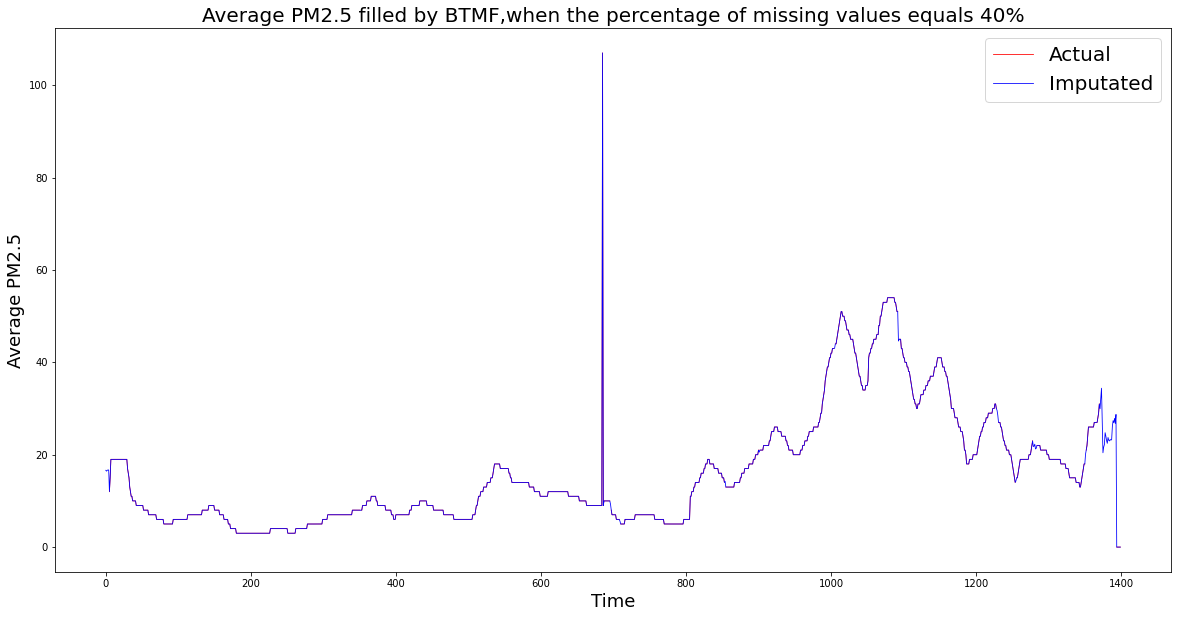

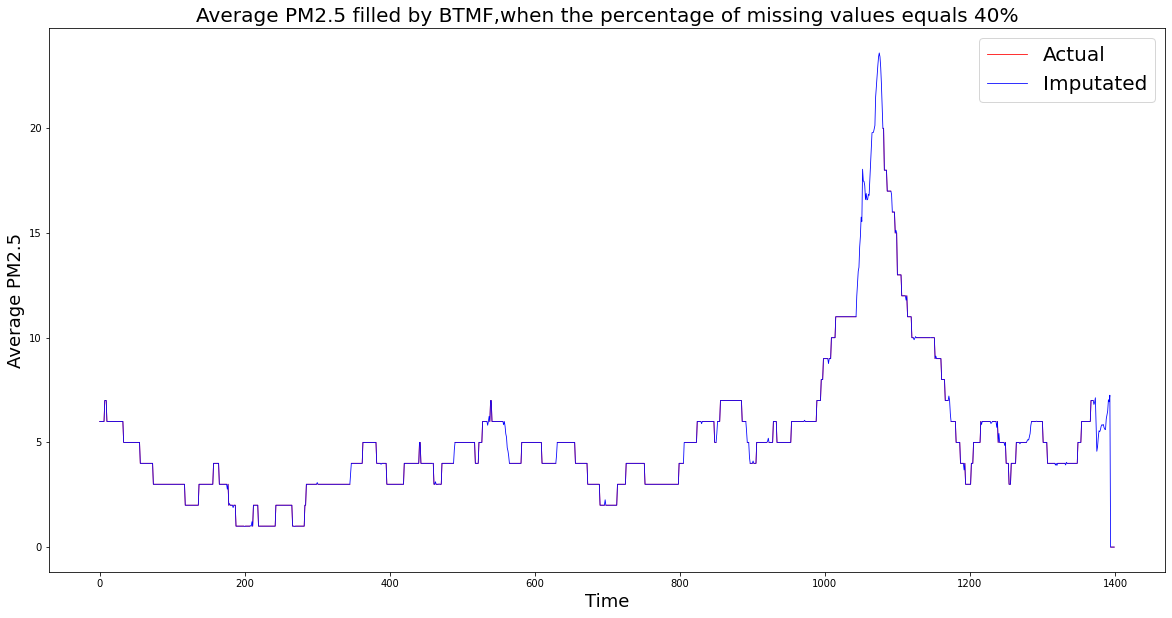

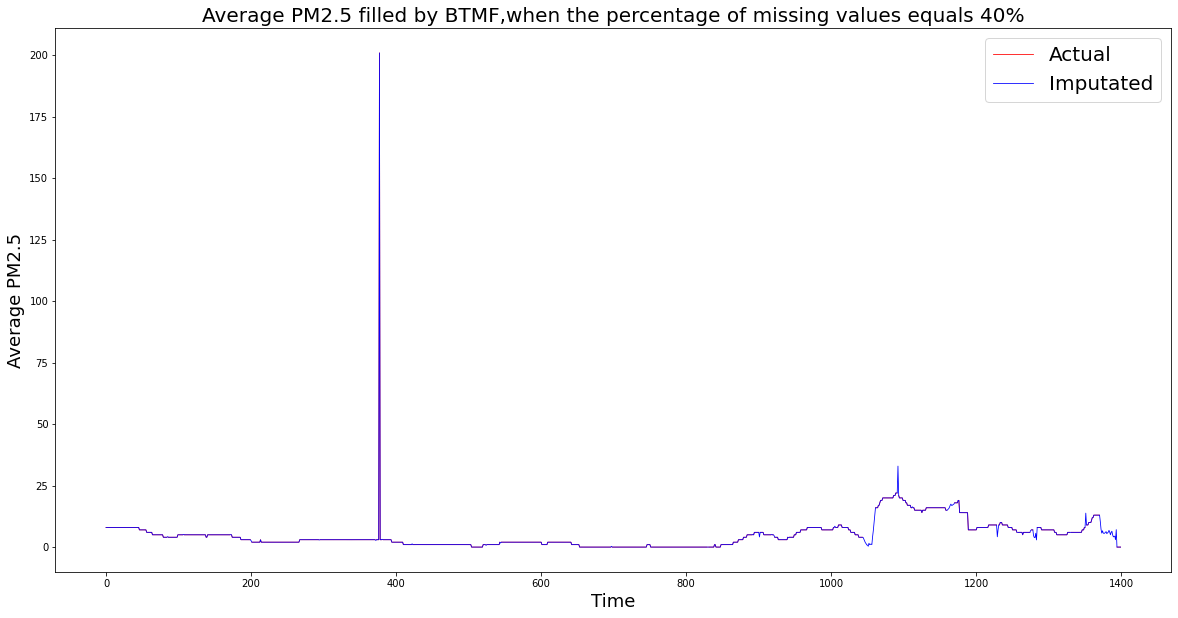

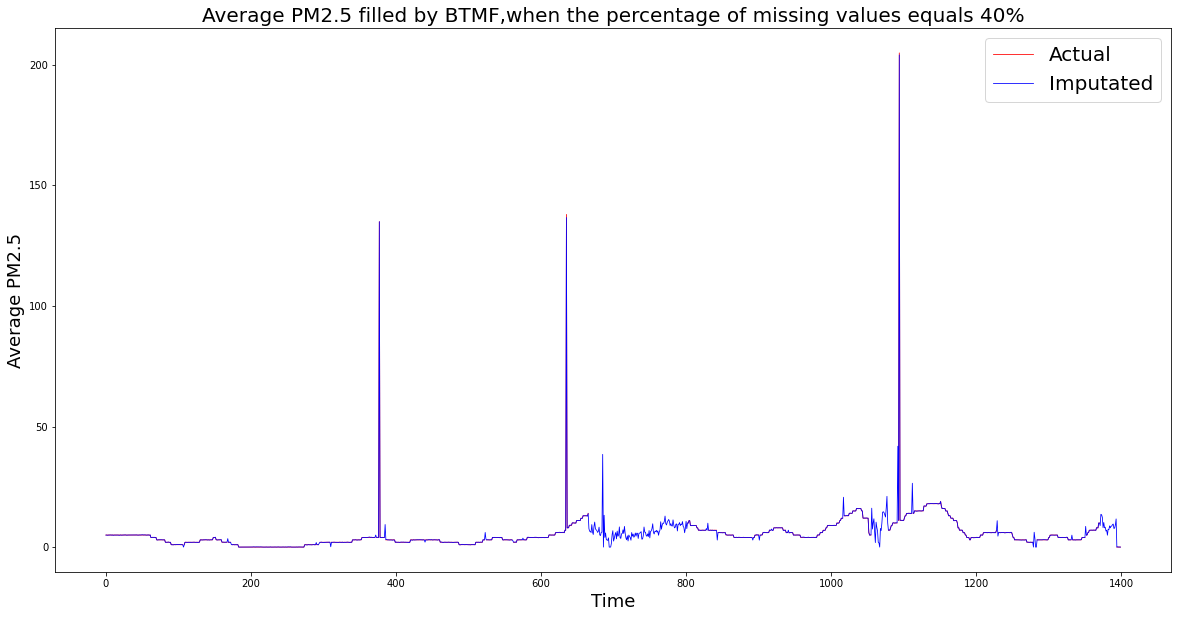

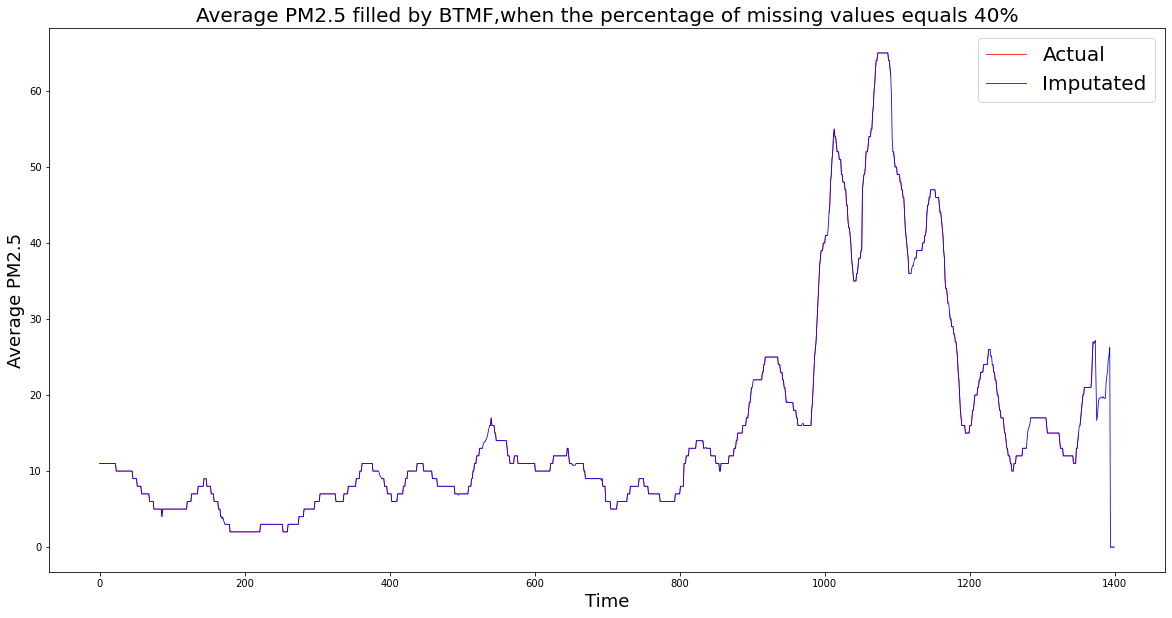

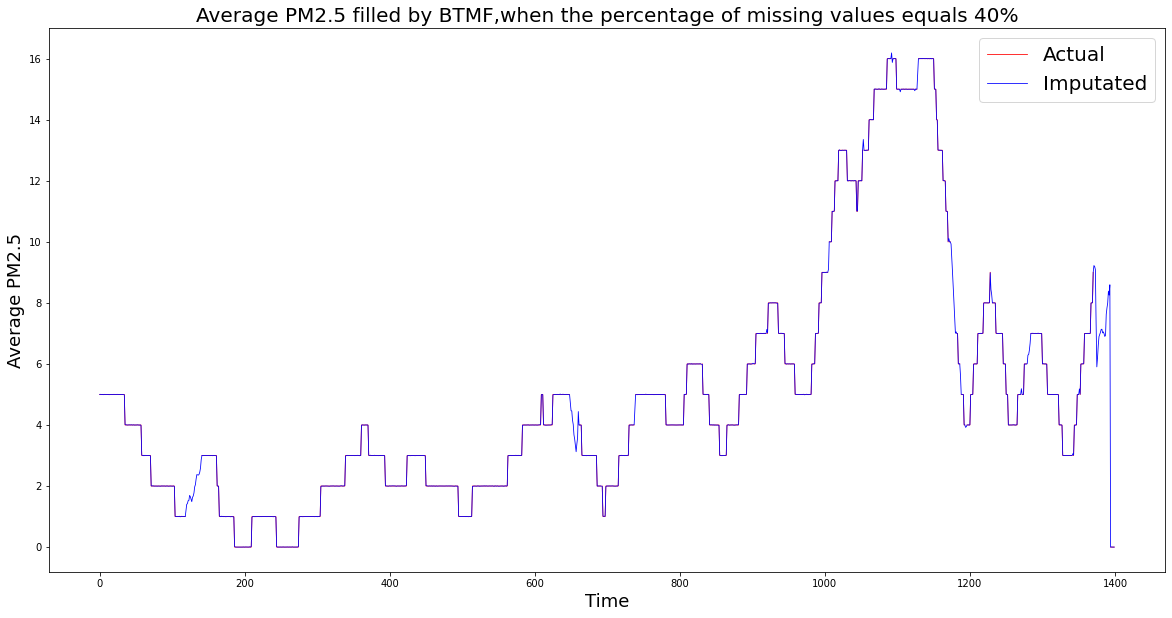

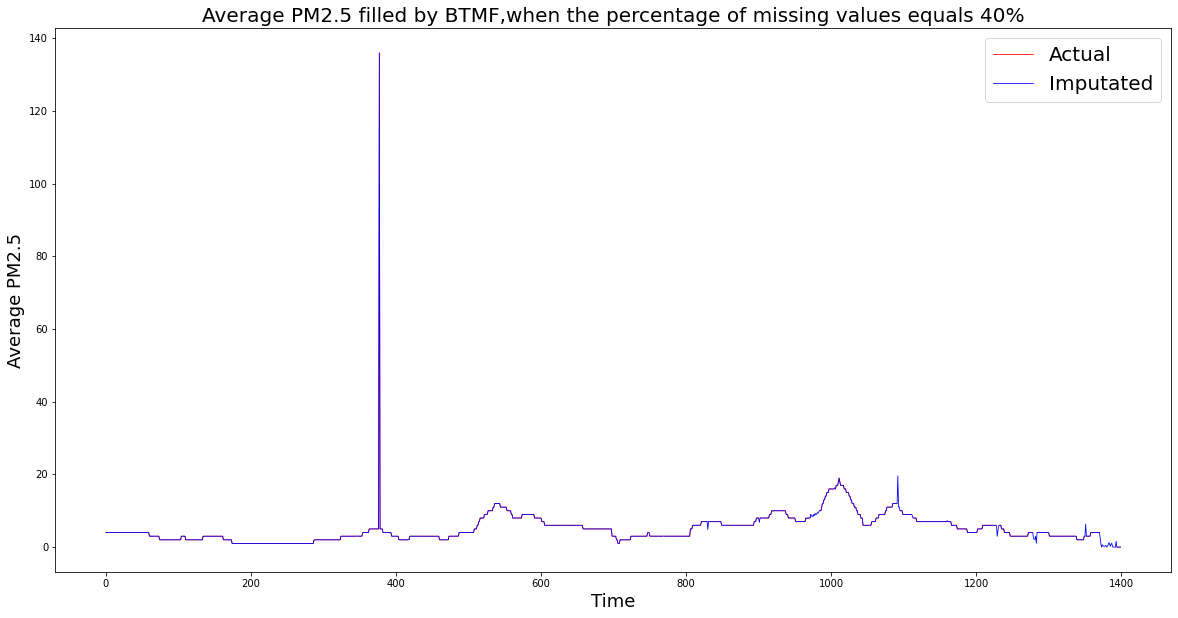

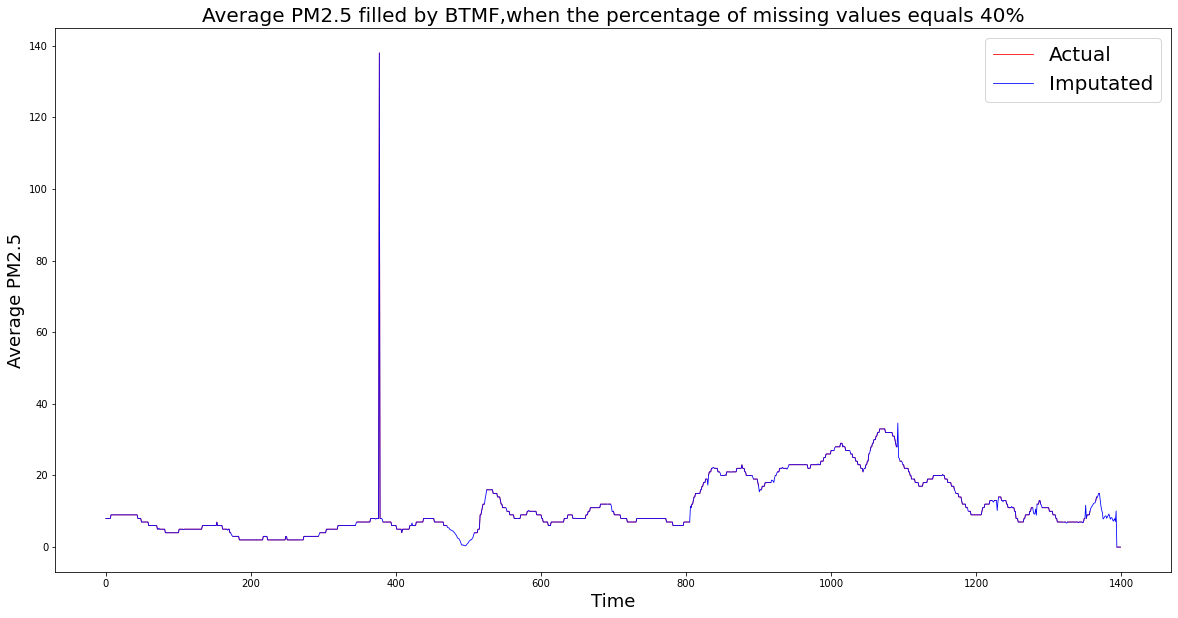

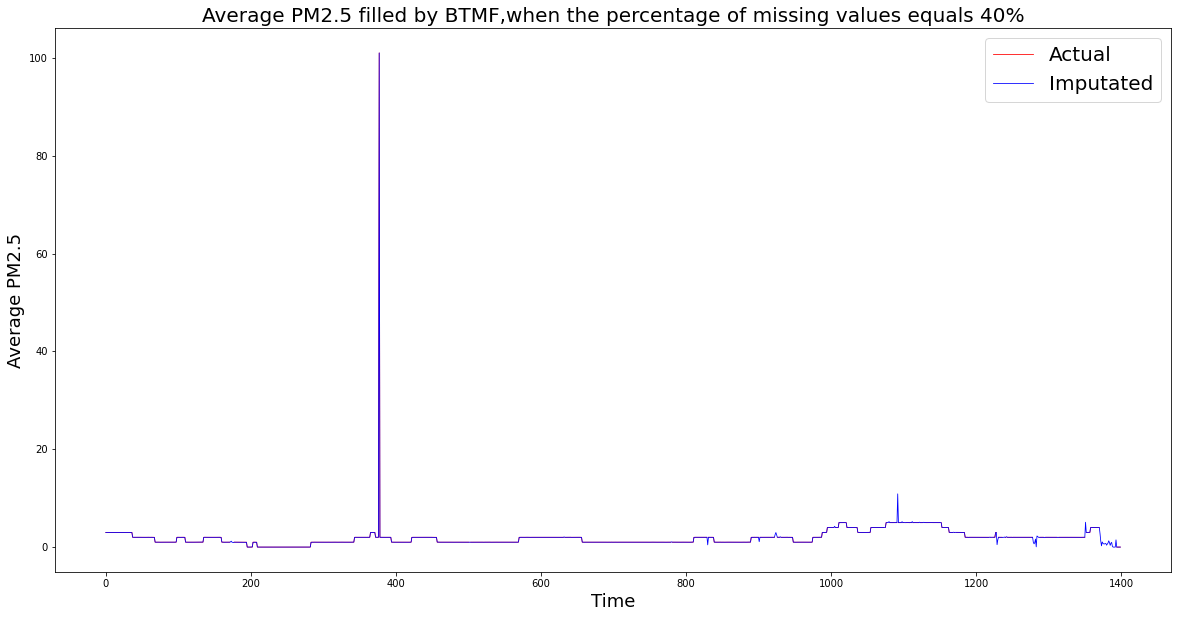

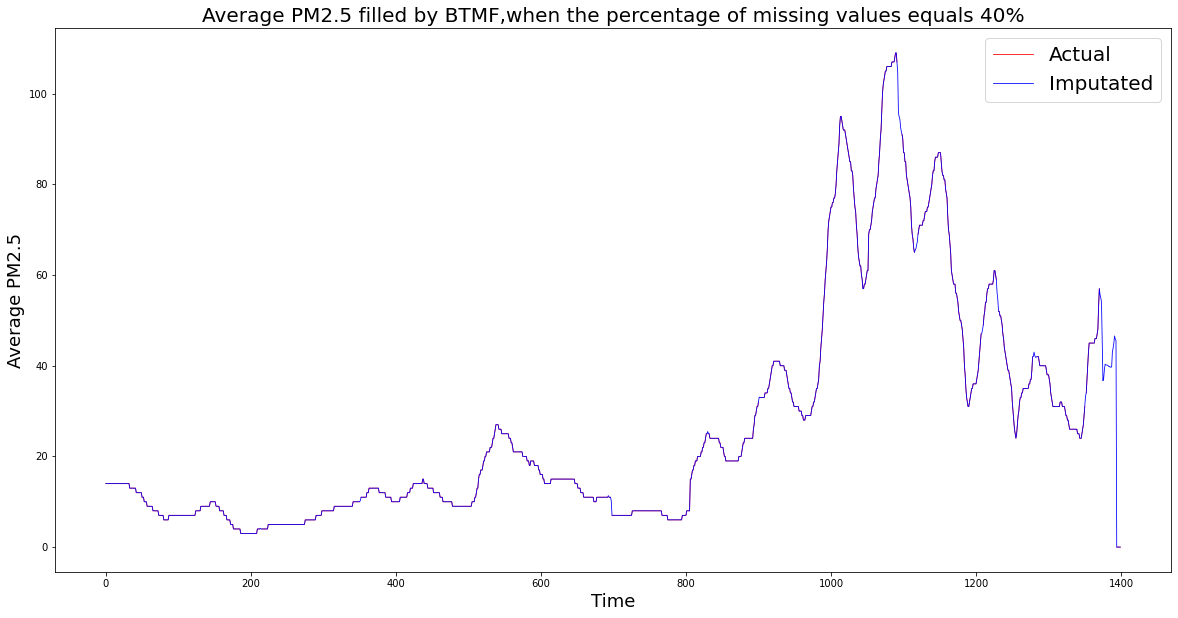

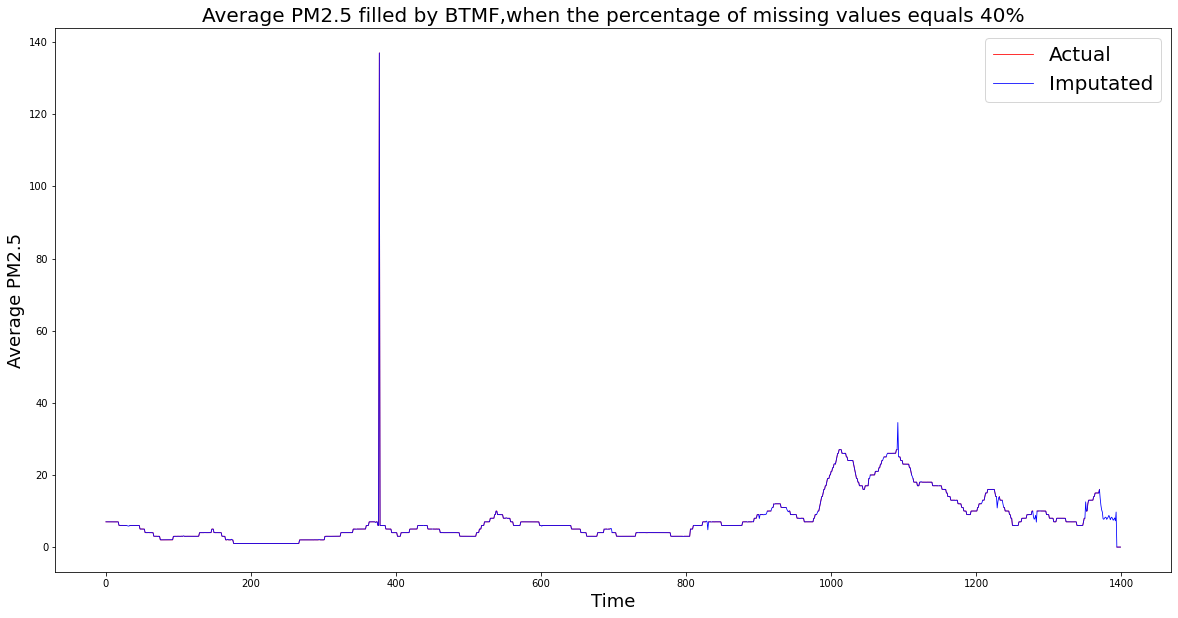

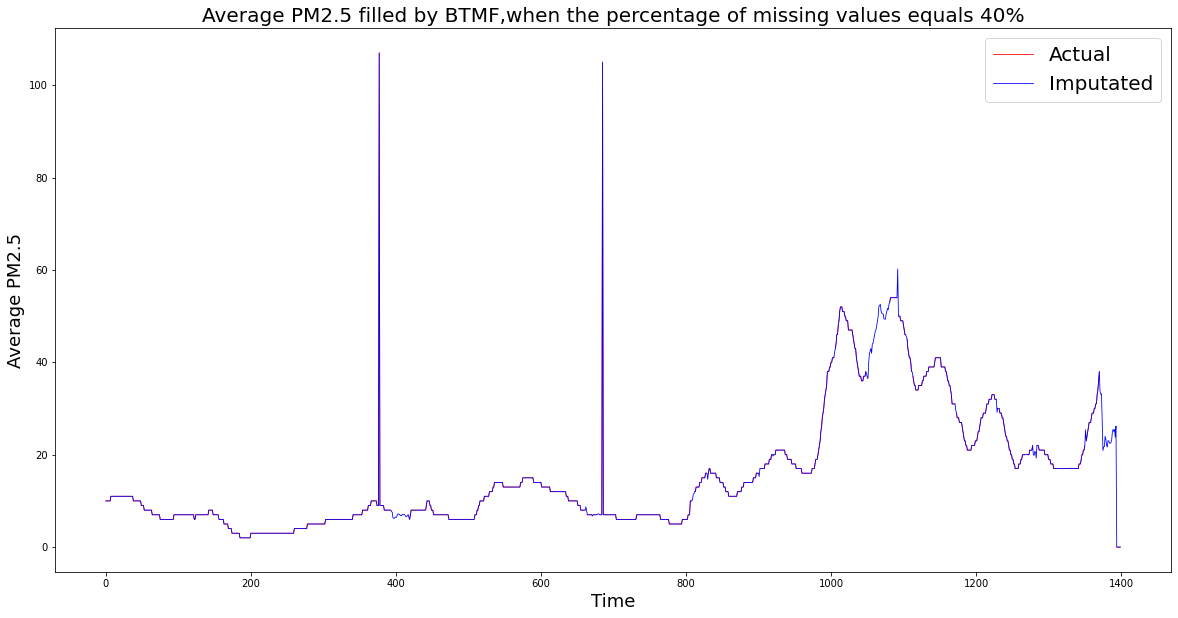

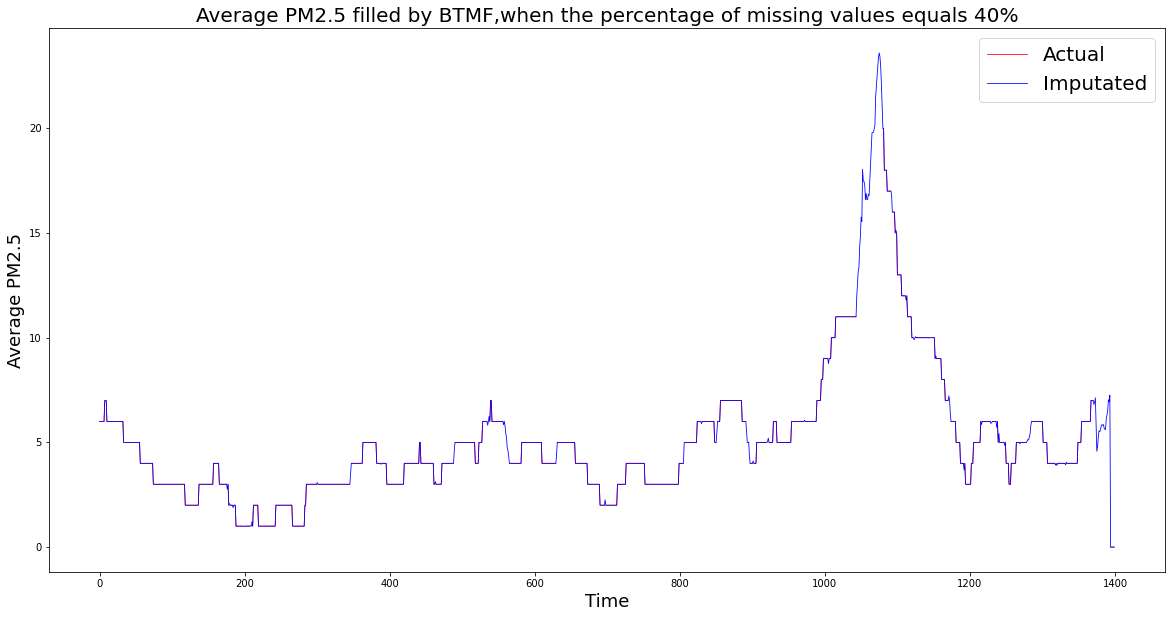

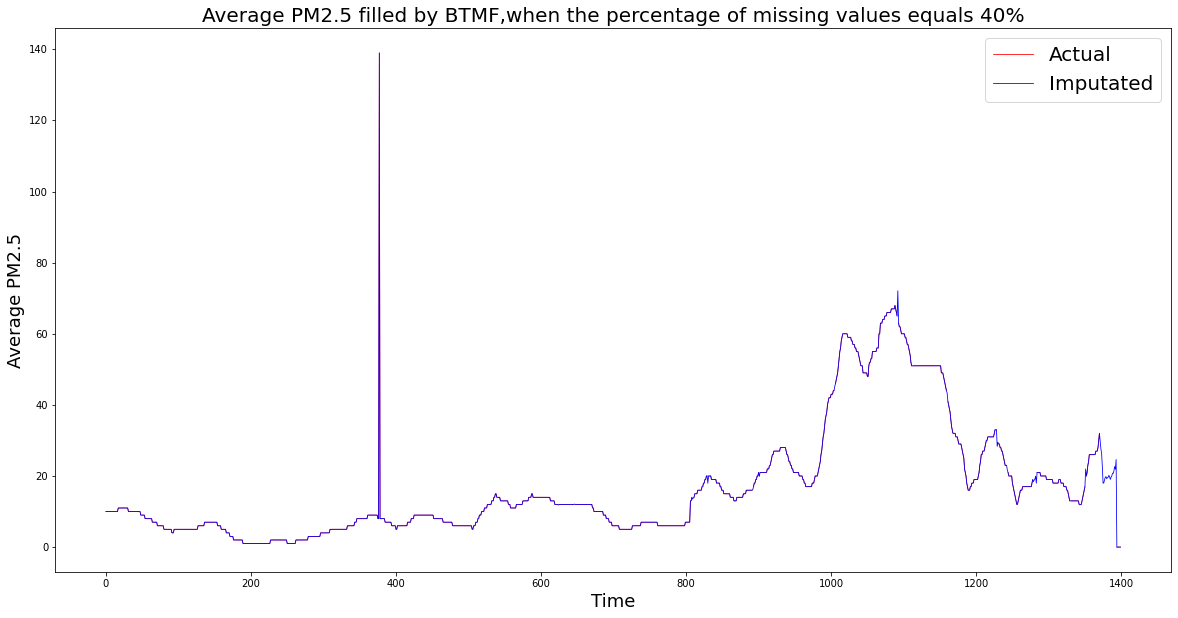

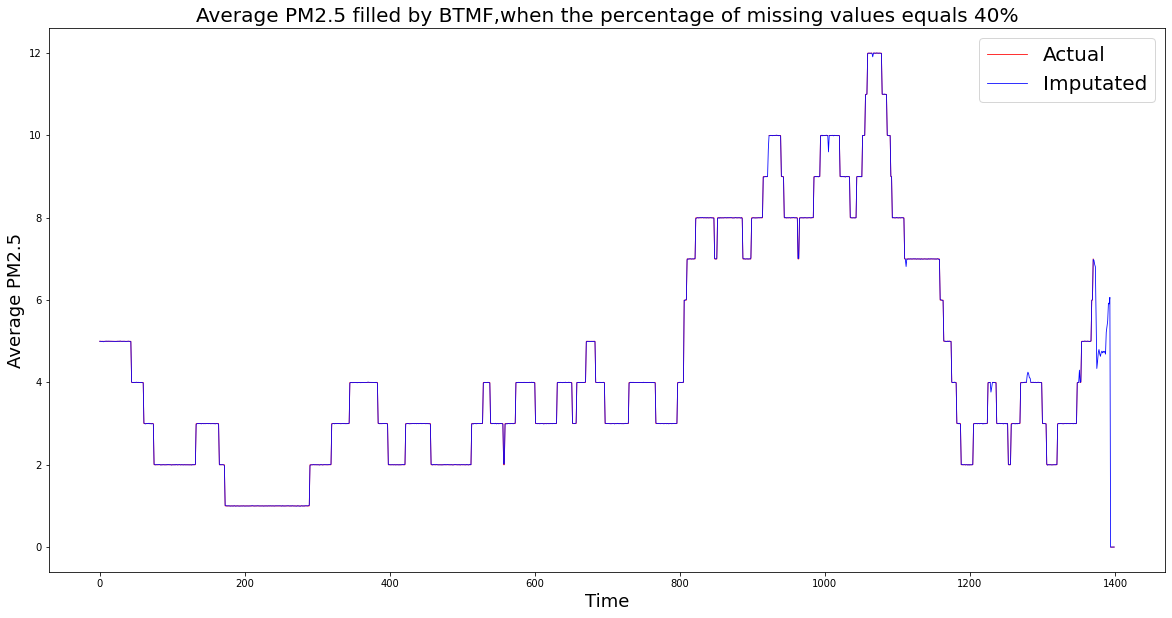

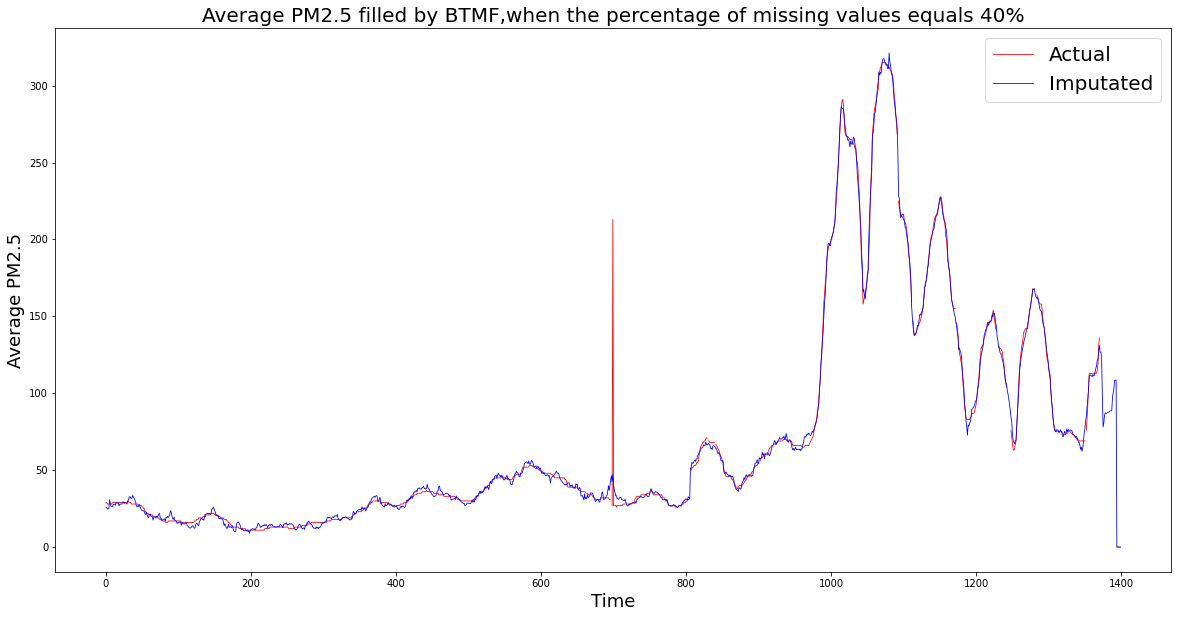

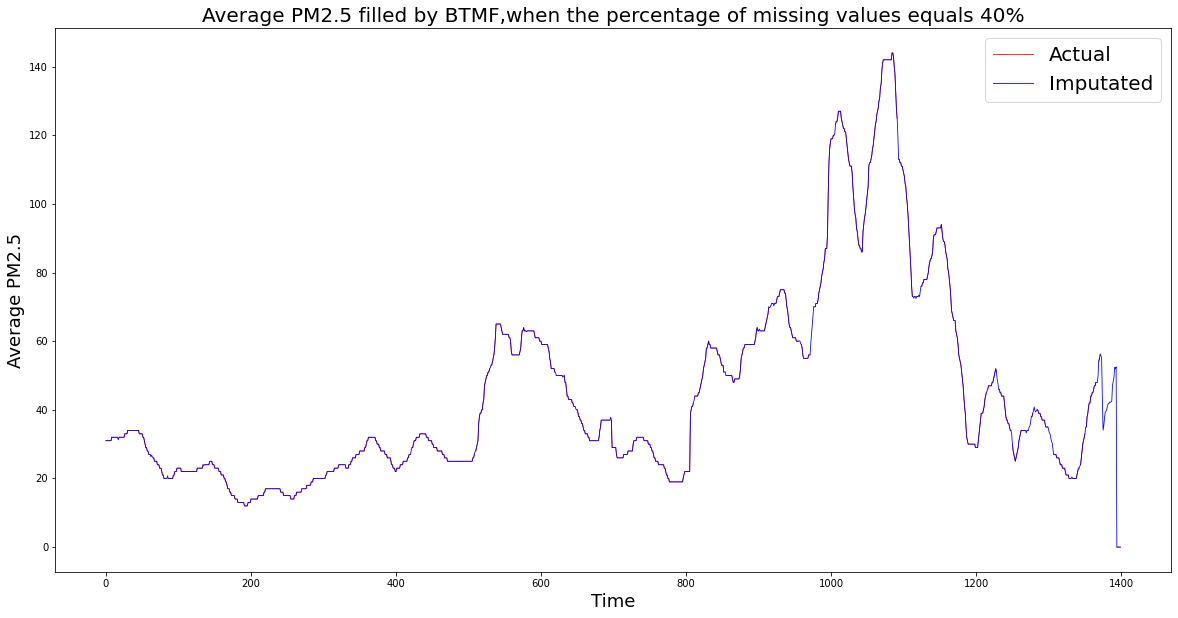

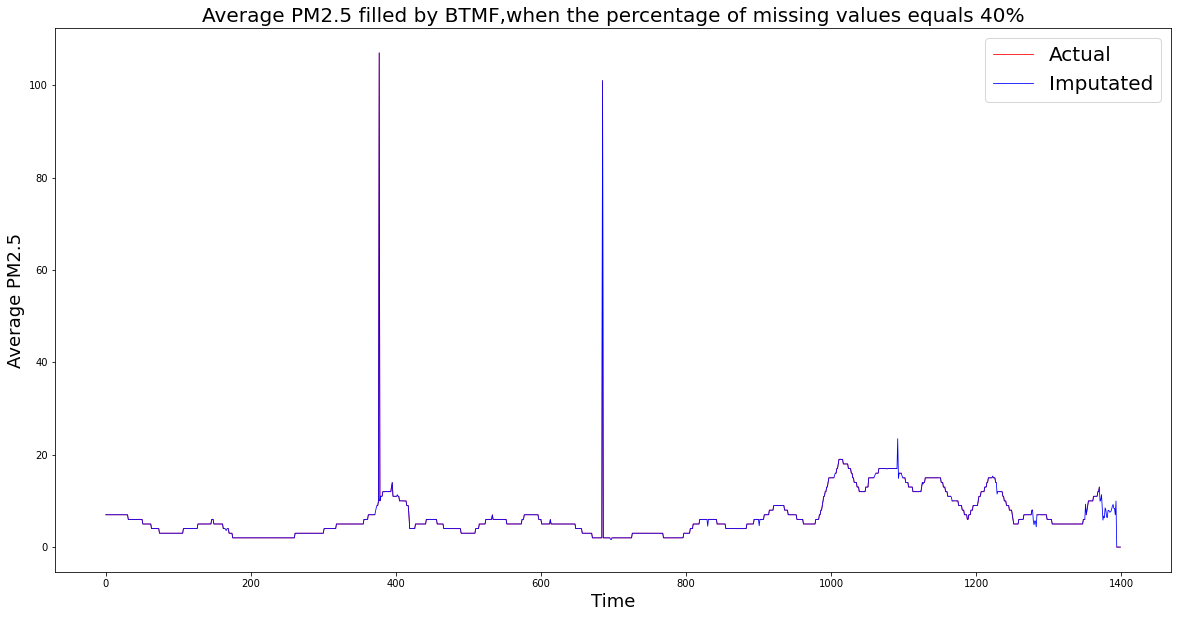

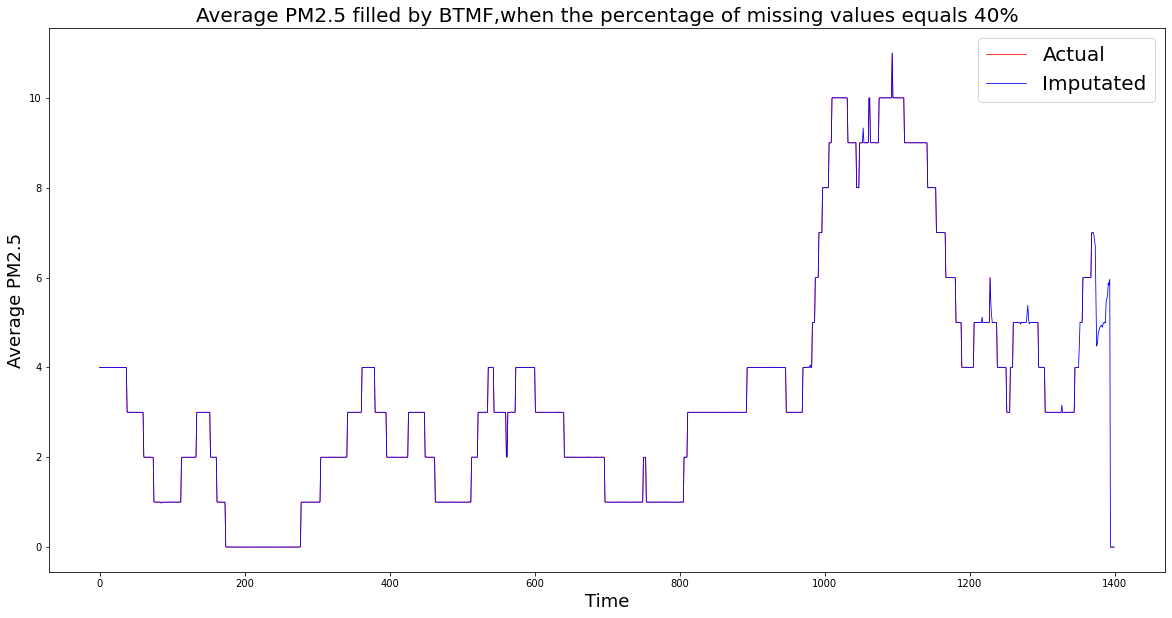

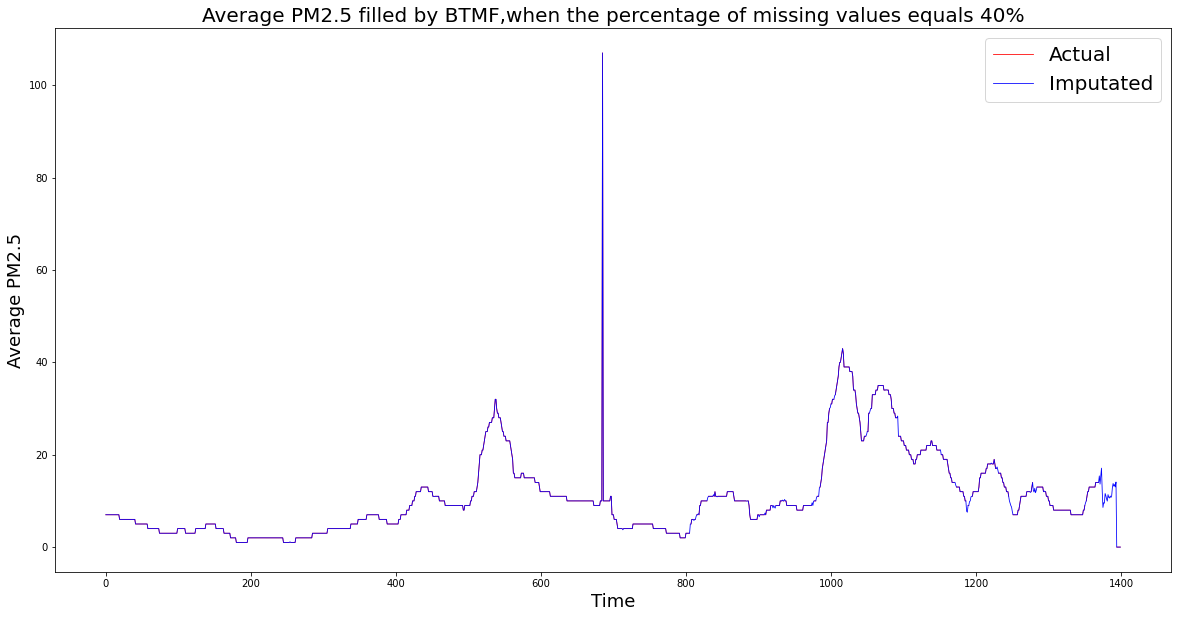

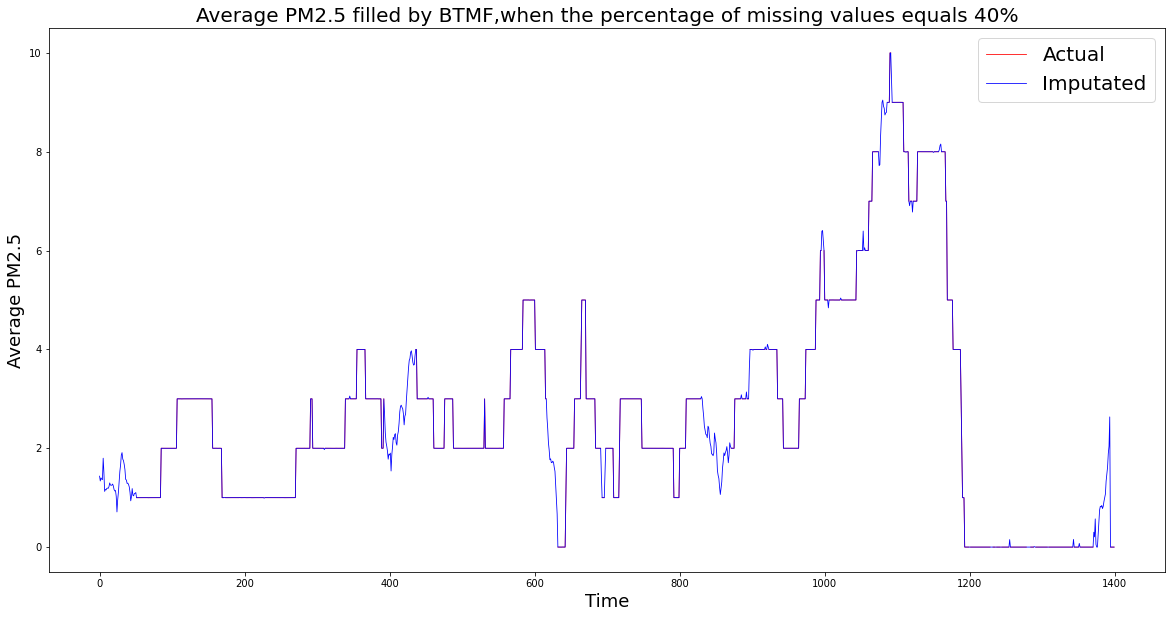

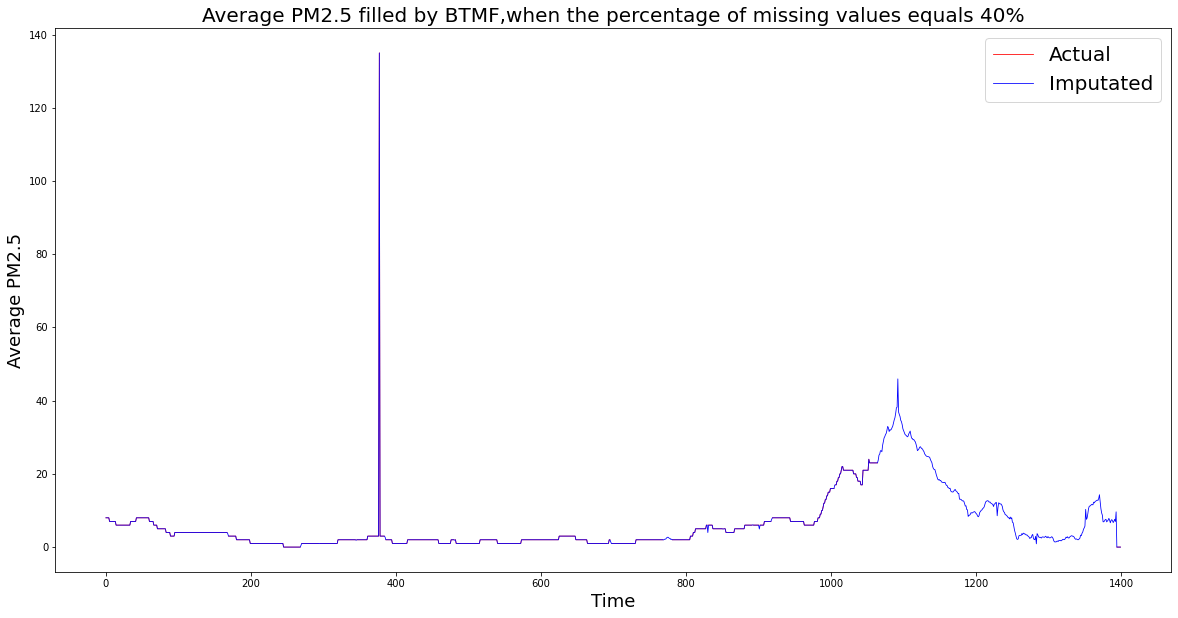

In [25]:
for idx in range(0, round(dense_mat.shape[0]/2)):
  plotTs(dense_mat[idx], mat_hat[idx], title='Average PM2.5 filled by BTMF,when the percentage of missing values equals 40%')

# BTTF

In [ ]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from scipy.stats import invwishart
from numpy.linalg import solve as solve
from numpy.linalg import cholesky as cholesky_lower
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

In [ ]:

def sample_factor_u(tau_sparse_tensor, tau_ind, U, V, X, beta0 = 1):
    """Sampling M-by-R factor matrix U and its hyperparameters (mu_u, Lambda_u)."""
    
    dim1, rank = U.shape
    U_bar = np.mean(U, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_mu_hyper = temp * U_bar
    var_U_hyper = inv(np.eye(rank) + cov_mat(U, U_bar) + temp * beta0 * np.outer(U_bar, U_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_U_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim1 + beta0) * var_Lambda_hyper)

    var1 = kr_prod(X, V).T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ ten2mat(tau_ind, 0).T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, None]
    var4 = var1 @ ten2mat(tau_sparse_tensor, 0).T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
    for i in range(dim1):
        U[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
        
    return U

In [ ]:
def sample_factor_v(tau_sparse_tensor, tau_ind, U, V, X, beta0 = 1):
    """Sampling N-by-R factor matrix V and its hyperparameters (mu_v, Lambda_v)."""
    
    dim2, rank = V.shape
    V_bar = np.mean(V, axis = 0)
    temp = dim2 / (dim2 + beta0)
    var_mu_hyper = temp * V_bar
    var_V_hyper = inv(np.eye(rank) + cov_mat(V, V_bar) + temp * beta0 * np.outer(V_bar, V_bar))
    var_Lambda_hyper = wishart.rvs(df = dim2 + rank, scale = var_V_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim2 + beta0) * var_Lambda_hyper)

    var1 = kr_prod(X, U).T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ ten2mat(tau_ind, 1).T).reshape([rank, rank, dim2]) + var_Lambda_hyper[:, :, None]
    var4 = var1 @ ten2mat(tau_sparse_tensor, 1).T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
    for j in range(dim2):
        V[j, :] = mvnrnd_pre(solve(var3[:, :, j], var4[:, j]), var3[:, :, j])
        
    return V

In [ ]:
def sample_theta(X, theta, Lambda_x, time_lags, beta0 = 1):
    
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    theta_bar = np.mean(theta, axis = 0)
    temp = d / (d + beta0)
    var_theta_hyper = inv(np.eye(rank) + cov_mat(theta, theta_bar) 
                          + temp * beta0 * np.outer(theta_bar, theta_bar))
    var_Lambda_hyper = wishart.rvs(df = d + rank, scale = var_theta_hyper)
    var_mu_hyper = mvnrnd_pre(temp * theta_bar, (d + beta0) * var_Lambda_hyper)
    
    for k in range(d):
        theta0 = theta.copy()
        theta0[k, :] = 0
        mat0 = np.zeros((dim - tmax, rank))
        for L in range(d):
            mat0 += X[tmax - time_lags[L] : dim - time_lags[L], :] @ np.diag(theta0[L, :])
        varPi = X[tmax : dim, :] - mat0
        var0 = X[tmax - time_lags[k] : dim - time_lags[k], :]
        var = np.einsum('ij, jk, ik -> j', var0, Lambda_x, varPi)
        var_Lambda = np.einsum('ti, tj, ij -> ij', var0, var0, Lambda_x) + var_Lambda_hyper
        theta[k, :] = mvnrnd_pre(solve(var_Lambda, var + var_Lambda_hyper @ var_mu_hyper), var_Lambda)
        
    return theta

In [ ]:
def sample_Lambda_x(X, theta, time_lags):
    
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    mat = X[: tmax, :].T @ X[: tmax, :]
    temp = np.zeros((dim - tmax, rank, d))
    for k in range(d):
        temp[:, :, k] = X[tmax - time_lags[k] : dim - time_lags[k], :]
    new_mat = X[tmax : dim, :] - np.einsum('kr, irk -> ir', theta, temp)
    Lambda_x = wishart.rvs(df = dim + rank, scale = inv(np.eye(rank) + mat + new_mat.T @ new_mat))
    
    return Lambda_x

In [ ]:
def sample_factor_x(tau_sparse_tensor, tau_ind, time_lags, U, V, X, theta, Lambda_x):
    """Sampling T-by-R factor matrix X."""

    dim3, rank = X.shape
    tmax = np.max(time_lags)
    tmin = np.min(time_lags)
    d = time_lags.shape[0]
    A = np.zeros((d * rank, rank))
    for k in range(d):
        A[k * rank : (k + 1) * rank, :] = np.diag(theta[k, :])
    A0 = np.dstack([A] * d)
    for k in range(d):
        A0[k * rank : (k + 1) * rank, :, k] = 0
    mat0 = Lambda_x @ A.T
    mat1 = np.einsum('kij, jt -> kit', A.reshape([d, rank, rank]), Lambda_x)
    mat2 = np.einsum('kit, kjt -> ij', mat1, A.reshape([d, rank, rank]))
    
    var1 = kr_prod(V, U).T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ ten2mat(tau_ind, 2).T).reshape([rank, rank, dim3]) + Lambda_x[:, :, None]
    var4 = var1 @ ten2mat(tau_sparse_tensor, 2).T
    for t in range(dim3):
        Mt = np.zeros((rank, rank))
        Nt = np.zeros(rank)
        Qt = mat0 @ X[t - time_lags, :].reshape(rank * d)
        index = list(range(0, d))
        if t >= dim3 - tmax and t < dim3 - tmin:
            index = list(np.where(t + time_lags < dim3))[0]
        elif t < tmax:
            Qt = np.zeros(rank)
            index = list(np.where(t + time_lags >= tmax))[0]
        if t < dim3 - tmin:
            Mt = mat2.copy()
            temp = np.zeros((rank * d, len(index)))
            n = 0
            for k in index:
                temp[:, n] = X[t + time_lags[k] - time_lags, :].reshape(rank * d)
                n += 1
            temp0 = X[t + time_lags[index], :].T - np.einsum('ijk, ik -> jk', A0[:, :, index], temp)
            Nt = np.einsum('kij, jk -> i', mat1[index, :, :], temp0)
        
        var3[:, :, t] = var3[:, :, t] + Mt
        if t < tmax:
            var3[:, :, t] = var3[:, :, t] - Lambda_x + np.eye(rank)
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t] + Nt + Qt), var3[:, :, t])

    return X

In [ ]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [ ]:
def BTRTF(dense_tensor, sparse_tensor, init, rank, time_lags, burn_iter, gibbs_iter):
    """Bayesian Temporal Regularized Tensor Factorization, BTRTF."""
    
    dim1, dim2, dim3 = sparse_tensor.shape
    d = time_lags.shape[0]
    U = init["U"]
    V = init["V"]
    X = init["X"]
    theta = 0.01 * np.random.randn(d, rank)
    if np.isnan(sparse_tensor).any() == False:
        ind = sparse_tensor != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_tensor != 0) & (sparse_tensor == 0))
    elif np.isnan(sparse_tensor).any() == True:
        pos_test = np.where((dense_tensor != 0) & (np.isnan(sparse_tensor)))
        ind = ~np.isnan(sparse_tensor)
        pos_obs = np.where(ind)
        sparse_tensor[np.isnan(sparse_tensor)] = 0
    dense_test = dense_tensor[pos_test]
    del dense_tensor
    U_plus = np.zeros((dim1, rank))
    V_plus = np.zeros((dim2, rank))
    X_plus = np.zeros((dim3, rank))
    theta_plus = np.zeros((d, rank))
    temp_hat = np.zeros(len(pos_test[0]))
    show_iter = 200
    tau = 1
    tensor_hat_plus = np.zeros(sparse_tensor.shape)
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau * ind
        tau_sparse_tensor = tau * sparse_tensor
        U = sample_factor_u(tau_sparse_tensor, tau_ind, U, V, X)
        V = sample_factor_v(tau_sparse_tensor, tau_ind, U, V, X)
        Lambda_x = sample_Lambda_x(X, theta, time_lags)
        theta = sample_theta(X, theta, Lambda_x, time_lags)
        X = sample_factor_x(tau_sparse_tensor, tau_ind, time_lags, U, V, X, theta, Lambda_x)
        tensor_hat = np.einsum('is, js, ts -> ijt', U, V, X)
        tau = np.random.gamma(1e-6 + 0.5 * np.sum(ind), 
                              1 / (1e-6 + 0.5 * np.sum(((sparse_tensor - tensor_hat) ** 2) * ind)))
        temp_hat += tensor_hat[pos_test]
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat)))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat)))
            temp_hat = np.zeros(len(pos_test[0]))
            print()
        if it + 1 > burn_iter:
            U_plus += U
            V_plus += V
            X_plus += X
            theta_plus += theta
            tensor_hat_plus += tensor_hat
    tensor_hat = tensor_hat_plus / gibbs_iter
    U = U_plus / gibbs_iter
    V = V_plus / gibbs_iter
    X = X_plus / gibbs_iter
    theta = theta_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, tensor_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, tensor_hat[pos_test])))
    print()
    
    return tensor_hat, U, V, X, theta

## Random Missing tests

In [ ]:
import scipy.io

dense_tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
rm_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.3

## Random missing (RM)
binary_tensor = np.round(rm_tensor + 0.5 - missing_rate)
sparse_tensor = dense_tensor.copy()
sparse_tensor[binary_tensor == 0] = np.nan

In [ ]:
import time
start = time.time()
dim1, dim2, dim3 = sparse_tensor.shape
rank = 30
time_lags = np.array([1, 2, 10])
init = {"U": 0.1 * np.random.randn(dim1, rank), "V": 0.1 * np.random.randn(dim2, rank),
        "X": 0.1 * np.random.randn(dim3, rank)}
burn_iter = 1000
gibbs_iter = 200
tensor_hat, U, V, X, theta = BTRTF(dense_tensor, sparse_tensor, init, rank, time_lags, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: 0.121012
RMSE: 6.16332

Iter: 400
MAPE: 0.108821
RMSE: 9.87376

Iter: 600
MAPE: 0.107971
RMSE: 11.707

Iter: 800
MAPE: 0.106989
RMSE: 9.44899

Iter: 1000
MAPE: 0.102107
RMSE: 7.42647

Imputation MAPE: 0.0978058
Imputation RMSE: 5.74003

Running time: 31 seconds


In [ ]:
dense_tensor.shape

(43, 11, 25)

In [ ]:
dense_tensor[0,1], tensor_hat[0,1]

(array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
        7., 7., 5., 5., 5., 5., 6., 6.]),
 array([6.31909367, 6.31318333, 6.30360554, 6.36053652, 6.30245298,
        6.29442777, 6.20588293, 6.21755593, 6.21404364, 6.2500421 ,
        6.23678923, 6.23064566, 6.41663443, 6.35829395, 6.38150578,
        6.27108626, 6.2580117 , 6.21954918, 6.25316648, 5.45601308,
        5.39656826, 5.33676603, 5.54710573, 5.63635035, 5.5169271 ]))

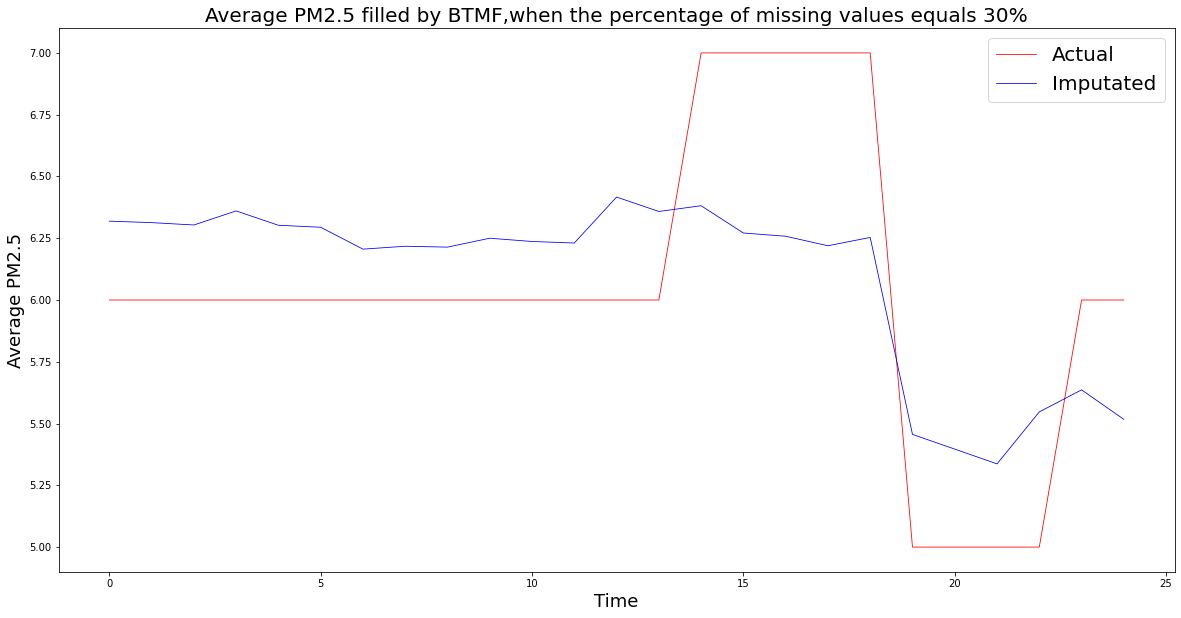

In [ ]:
plotTs(dense_tensor[0,1], tensor_hat[0,1], title='Average PM2.5 filled by BTMF,when the percentage of missing values equals 30%')

# Sección nueva